<a href="https://colab.research.google.com/github/Mhmmd-Mhmmd/Net-Analysis/blob/main/California_housing_grid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
import tensorflow.keras as k
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [ ]:
california_housing = fetch_california_housing()

X_train, X_test, y_train, y_test = train_test_split(california_housing['data'],
                                                    california_housing['target'])

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train)

sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_valid = sc.transform(X_valid)
X_test = sc.transform(X_test)


In [ ]:
model_checkpoint_callback = k.callbacks.ModelCheckpoint('model_chechpoints_cal_house_reg_func.h5',
                                                        save_best_only=True, # it means instead of saving all models only save best one since
                                                       )
early_stopping_callbacks = k.callbacks.EarlyStopping(patience=50,
                                                     restore_best_weights=True
                                                    )
tb_callback = k.callbacks.TensorBoard('tb_logs') # it's a relative address whitch means here in this very same directory make a new one


In [ ]:
def ann_model(
    number_hidden_layers = 1,
    number_neurons = 50,
    lr=0.1):
  model = k.models.Sequential()
  model.add(k.layers.InputLayer(input_shape=X_train.shape[1:]))
  for num in range(number_hidden_layers):
    model.add(k.layers.Dense(number_neurons, activation='selu'))
  model.add(k.layers.Dense(1, activation='relu'))

  sgd = k.optimizers.SGD(lr=lr)
  model.compile(
      loss='mse',
      optimizer=sgd

  )

  return model

In [ ]:
keras_skl_reg = k.wrappers.scikit_learn.KerasRegressor(build_fn=ann_model)

param_grid = {'number_hidden_layers' : [1, 3, 5],
              'number_neurons' : [50, 100, 150],
              'lr' : [0.1, 0.01, 0.001]

}

keras_skl_reg_gs = GridSearchCV(keras_skl_reg, param_grid=param_grid)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [ ]:
keras_skl_reg_gs.fit(
    X_train,
    y_train,
    validation_data=[X_valid, y_valid],
    epochs=5
)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 4s 5ms/step - loss: 0.5802 - val_loss: 0.6467
Epoch 2/5
291/291 [==============================] - 2s 6ms/step - loss: 0.4782 - val_loss: 0.5887
Epoch 3/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4607 - val_loss: 0.4168
Epoch 4/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4529 - val_loss: 0.4944
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.6361
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 3ms/step - loss: 0.5929 - val_loss: 0.6953
Epoch 2/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4702 - val_loss: 0.4515
Epoch 3/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4587 - val_loss: 0.4790
Epoch 4/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4523 - val_loss: 0.4999
Epoch 5/5
73/73 [==============================] - 0s 1ms/step - loss: 0.5606
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 3ms/step - loss: 0.5841 - val_loss: 0.6593
Epoch 2/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4763 - val_loss: 0.6434
Epoch 3/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4640 - val_loss: 0.4306
Epoch 4/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4592 - val_loss: 0.4503
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.4413
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 3ms/step - loss: 0.6102 - val_loss: 0.6269
Epoch 2/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4879 - val_loss: 0.5222
Epoch 3/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4695 - val_loss: 0.4207
Epoch 4/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4573 - val_loss: 0.4471
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.5712
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 2ms/step - loss: 0.5813 - val_loss: 0.4753
Epoch 2/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4808 - val_loss: 0.4906
Epoch 3/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4680 - val_loss: 0.5739
Epoch 4/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4658 - val_loss: 0.4226
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.4313
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 2s 5ms/step - loss: 0.9845 - val_loss: 178.6660
Epoch 2/5
291/291 [==============================] - 1s 3ms/step - loss: 5.5700 - val_loss: 5.6856
Epoch 3/5
291/291 [==============================] - 1s 3ms/step - loss: 5.5186 - val_loss: 5.6856
Epoch 4/5
291/291 [==============================] - 1s 3ms/step - loss: 5.5186 - val_loss: 5.6856
Epoch 5/5
73/73 [==============================] - 0s 1ms/step - loss: 5.7146
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 2ms/step - loss: 0.6000 - val_loss: 0.6622
Epoch 2/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4781 - val_loss: 0.5983
Epoch 3/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4653 - val_loss: 0.4969
Epoch 4/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4458 - val_loss: 0.4052
Epoch 5/5
73/73 [==============================] - 0s 1ms/step - loss: 0.4956
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 2ms/step - loss: 0.5960 - val_loss: 0.7064
Epoch 2/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4782 - val_loss: 0.6147
Epoch 3/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4538 - val_loss: 0.4360
Epoch 4/5
291/291 [==============================] - 1s 4ms/step - loss: 0.4553 - val_loss: 0.4930
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.5931
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 3ms/step - loss: 0.5850 - val_loss: 0.4732
Epoch 2/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4851 - val_loss: 0.4903
Epoch 3/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4679 - val_loss: 0.4984
Epoch 4/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4605 - val_loss: 0.4785
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.4437
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 3ms/step - loss: 0.6025 - val_loss: 0.4872
Epoch 2/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4919 - val_loss: 0.5156
Epoch 3/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4663 - val_loss: 0.9322
Epoch 4/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4612 - val_loss: 0.4866
Epoch 5/5
73/73 [==============================] - 0s 1ms/step - loss: 0.5880
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 3ms/step - loss: 0.5921 - val_loss: 0.4561
Epoch 2/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4718 - val_loss: 0.6004
Epoch 3/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4568 - val_loss: 0.4890
Epoch 4/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4455 - val_loss: 0.5269
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.5513
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 3ms/step - loss: 0.5681 - val_loss: 0.9072
Epoch 2/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4791 - val_loss: 0.4760
Epoch 3/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4571 - val_loss: 0.6013
Epoch 4/5
291/291 [==============================] - 1s 3ms/step - loss: 0.5165 - val_loss: 0.5528
Epoch 5/5
73/73 [==============================] - 0s 1ms/step - loss: 0.4869
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 3ms/step - loss: 0.5999 - val_loss: 0.7425
Epoch 2/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4754 - val_loss: 0.5907
Epoch 3/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4639 - val_loss: 0.5256
Epoch 4/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4514 - val_loss: 0.7374
Epoch 5/5
73/73 [==============================] - 0s 1ms/step - loss: 0.4545
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 2ms/step - loss: 0.5942 - val_loss: 0.4351
Epoch 2/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4843 - val_loss: 0.4726
Epoch 3/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4703 - val_loss: 0.4571
Epoch 4/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4611 - val_loss: 0.4709
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.4928
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 3ms/step - loss: 0.6040 - val_loss: 0.5815
Epoch 2/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4825 - val_loss: 0.5328
Epoch 3/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4654 - val_loss: 0.4337
Epoch 4/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4627 - val_loss: 0.5029
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.5196
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 2ms/step - loss: 49201392.0000 - val_loss: 5.6856
Epoch 2/5
291/291 [==============================] - 1s 3ms/step - loss: 5.5186 - val_loss: 5.6856
Epoch 3/5
291/291 [==============================] - 1s 3ms/step - loss: 5.5186 - val_loss: 5.6856
Epoch 4/5
291/291 [==============================] - 1s 3ms/step - loss: 5.5186 - val_loss: 5.6856
Epoch 5/5
73/73 [==============================] - 0s 1ms/step - loss: 5.7146
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 3ms/step - loss: 808.0768 - val_loss: 5.6856
Epoch 2/5
291/291 [==============================] - 1s 2ms/step - loss: 5.5532 - val_loss: 5.6856
Epoch 3/5
291/291 [==============================] - 1s 3ms/step - loss: 5.5532 - val_loss: 5.6856
Epoch 4/5
291/291 [==============================] - 1s 2ms/step - loss: 5.5532 - val_loss: 5.6856
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 5.5763
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 3ms/step - loss: 24.5913 - val_loss: 5.6856
Epoch 2/5
291/291 [==============================] - 1s 2ms/step - loss: 5.5837 - val_loss: 5.6856
Epoch 3/5
291/291 [==============================] - 1s 2ms/step - loss: 5.5837 - val_loss: 5.6856
Epoch 4/5
291/291 [==============================] - 1s 2ms/step - loss: 5.5837 - val_loss: 5.6856
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 5.4540
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 2s 3ms/step - loss: 241.7887 - val_loss: 5.6856
Epoch 2/5
291/291 [==============================] - 1s 3ms/step - loss: 5.5793 - val_loss: 5.6856
Epoch 3/5
291/291 [==============================] - 1s 3ms/step - loss: 5.5793 - val_loss: 5.6856
Epoch 4/5
291/291 [==============================] - 1s 3ms/step - loss: 5.5793 - val_loss: 5.6856
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 5.4716
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 3ms/step - loss: 5293.0776 - val_loss: 5.6856
Epoch 2/5
291/291 [==============================] - 1s 2ms/step - loss: 5.5541 - val_loss: 5.6856
Epoch 3/5
291/291 [==============================] - 1s 3ms/step - loss: 5.5541 - val_loss: 5.6856
Epoch 4/5
291/291 [==============================] - 1s 3ms/step - loss: 5.5541 - val_loss: 5.6856
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 5.5725
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 2s 4ms/step - loss: nan - val_loss: nan
Epoch 2/5
291/291 [==============================] - 1s 4ms/step - loss: nan - val_loss: nan
Epoch 3/5
291/291 [==============================] - 1s 4ms/step - loss: nan - val_loss: nan
Epoch 4/5
291/291 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 5/5
73/73 [==============================] - 0s 1ms/step - loss: nan
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 3ms/step - loss: 186.0727 - val_loss: 189339435008.0000
Epoch 2/5
291/291 [==============================] - 1s 3ms/step - loss: 5.5532 - val_loss: 189339435008.0000
Epoch 3/5
291/291 [==============================] - 1s 3ms/step - loss: 5.5532 - val_loss: 189339435008.0000
Epoch 4/5
291/291 [==============================] - 1s 2ms/step - loss: 5.5532 - val_loss: 189339435008.0000
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 293187158016.0000
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 3ms/step - loss: 1716739456.0000 - val_loss: 5.6856
Epoch 2/5
291/291 [==============================] - 1s 4ms/step - loss: 5.5837 - val_loss: 5.6856
Epoch 3/5
291/291 [==============================] - 1s 3ms/step - loss: 5.5837 - val_loss: 5.6856
Epoch 4/5
291/291 [==============================] - 1s 3ms/step - loss: 5.5837 - val_loss: 5.6856
Epoch 5/5
73/73 [==============================] - 0s 1ms/step - loss: 5.4540
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 2/5
291/291 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 3/5
291/291 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 4/5
291/291 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: nan
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 4ms/step - loss: 72401.8359 - val_loss: 5.6856
Epoch 2/5
291/291 [==============================] - 1s 3ms/step - loss: 5.5541 - val_loss: 5.6856
Epoch 3/5
291/291 [==============================] - 1s 3ms/step - loss: 5.5541 - val_loss: 5.6856
Epoch 4/5
291/291 [==============================] - 1s 2ms/step - loss: 5.5541 - val_loss: 5.6856
Epoch 5/5
73/73 [==============================] - 0s 1ms/step - loss: 5.5725
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 3ms/step - loss: 5.7616 - val_loss: 5.6856
Epoch 2/5
291/291 [==============================] - 1s 4ms/step - loss: 5.5186 - val_loss: 5.6856
Epoch 3/5
291/291 [==============================] - 1s 4ms/step - loss: 5.5186 - val_loss: 5.6856
Epoch 4/5
291/291 [==============================] - 1s 3ms/step - loss: 5.5186 - val_loss: 5.6856
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 5.7146
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 4ms/step - loss: 9140.1836 - val_loss: 5.6856
Epoch 2/5
291/291 [==============================] - 1s 3ms/step - loss: 5.5532 - val_loss: 5.6856
Epoch 3/5
291/291 [==============================] - 1s 3ms/step - loss: 5.5532 - val_loss: 5.6856
Epoch 4/5
291/291 [==============================] - 1s 3ms/step - loss: 5.5532 - val_loss: 5.6856
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 5.5763
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 2s 4ms/step - loss: 59.9320 - val_loss: 72855872.0000
Epoch 2/5
291/291 [==============================] - 1s 3ms/step - loss: 5.5837 - val_loss: 72855872.0000
Epoch 3/5
291/291 [==============================] - 1s 3ms/step - loss: 5.5837 - val_loss: 72855872.0000
Epoch 4/5
291/291 [==============================] - 1s 3ms/step - loss: 5.5837 - val_loss: 72855872.0000
Epoch 5/5
73/73 [==============================] - 0s 3ms/step - loss: 5.4540
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 3ms/step - loss: 20.5206 - val_loss: 5.6856
Epoch 2/5
291/291 [==============================] - 1s 3ms/step - loss: 5.5793 - val_loss: 5.6856
Epoch 3/5
291/291 [==============================] - 1s 3ms/step - loss: 5.5793 - val_loss: 5.6856
Epoch 4/5
291/291 [==============================] - 1s 3ms/step - loss: 5.5793 - val_loss: 5.6856
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 5.4716
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 2s 4ms/step - loss: 1151398144.0000 - val_loss: 5.6856
Epoch 2/5
291/291 [==============================] - 1s 3ms/step - loss: 5.5541 - val_loss: 5.6856
Epoch 3/5
291/291 [==============================] - 1s 3ms/step - loss: 5.5541 - val_loss: 5.6856
Epoch 4/5
291/291 [==============================] - 1s 3ms/step - loss: 5.5541 - val_loss: 5.6856
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 5.5725
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 2s 4ms/step - loss: 6.5659 - val_loss: 5.6856
Epoch 2/5
291/291 [==============================] - 1s 3ms/step - loss: 5.5186 - val_loss: 5.6856
Epoch 3/5
291/291 [==============================] - 1s 2ms/step - loss: 5.5186 - val_loss: 5.6856
Epoch 4/5
291/291 [==============================] - 1s 3ms/step - loss: 5.5186 - val_loss: 5.6856
Epoch 5/5
73/73 [==============================] - 0s 1ms/step - loss: 5.7146
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 4ms/step - loss: 17.4850 - val_loss: 5.6856
Epoch 2/5
291/291 [==============================] - 1s 2ms/step - loss: 5.5532 - val_loss: 5.6856
Epoch 3/5
291/291 [==============================] - 1s 3ms/step - loss: 5.5532 - val_loss: 5.6856
Epoch 4/5
291/291 [==============================] - 1s 3ms/step - loss: 5.5532 - val_loss: 5.6856
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 5.5763
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 3ms/step - loss: 2960.9404 - val_loss: 5.6856
Epoch 2/5
291/291 [==============================] - 1s 3ms/step - loss: 5.5837 - val_loss: 5.6856
Epoch 3/5
291/291 [==============================] - 1s 3ms/step - loss: 5.5837 - val_loss: 5.6856
Epoch 4/5
291/291 [==============================] - 1s 4ms/step - loss: 5.5837 - val_loss: 5.6856
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 5.4540


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/5
291/291 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 2/5
291/291 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 3/5
291/291 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 4/5
291/291 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: nan
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 3ms/step - loss: 9.8219 - val_loss: 5.6856
Epoch 2/5
291/291 [==============================] - 1s 3ms/step - loss: 5.5541 - val_loss: 5.6856
Epoch 3/5
291/291 [==============================] - 1s 4ms/step - loss: 5.5541 - val_loss: 5.6856
Epoch 4/5
291/291 [==============================] - 1s 3ms/step - loss: 5.5541 - val_loss: 5.6856
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 5.5725
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 4ms/step - loss: nan - val_loss: nan
Epoch 2/5
291/291 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 3/5
291/291 [==============================] - 1s 4ms/step - loss: nan - val_loss: nan
Epoch 4/5
291/291 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: nan
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 3ms/step - loss: 324.5806 - val_loss: 5.6856
Epoch 2/5
291/291 [==============================] - 1s 3ms/step - loss: 5.5532 - val_loss: 5.6856
Epoch 3/5
291/291 [==============================] - 1s 4ms/step - loss: 5.5532 - val_loss: 5.6856
Epoch 4/5
291/291 [==============================] - 1s 4ms/step - loss: 5.5532 - val_loss: 5.6856
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 5.5763
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 3ms/step - loss: 27.2410 - val_loss: 5.6856
Epoch 2/5
291/291 [==============================] - 1s 3ms/step - loss: 5.5837 - val_loss: 5.6856
Epoch 3/5
291/291 [==============================] - 1s 4ms/step - loss: 5.5837 - val_loss: 5.6856
Epoch 4/5
291/291 [==============================] - 1s 4ms/step - loss: 5.5837 - val_loss: 5.6856
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 5.4540
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 2s 4ms/step - loss: 19016.2305 - val_loss: 5.6856
Epoch 2/5
291/291 [==============================] - 1s 3ms/step - loss: 5.5793 - val_loss: 5.6856
Epoch 3/5
291/291 [==============================] - 1s 3ms/step - loss: 5.5793 - val_loss: 5.6856
Epoch 4/5
291/291 [==============================] - 1s 4ms/step - loss: 5.5793 - val_loss: 5.6856
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 5.4716
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 2s 4ms/step - loss: 40.1998 - val_loss: 5.6856
Epoch 2/5
291/291 [==============================] - 1s 4ms/step - loss: 5.5541 - val_loss: 5.6856
Epoch 3/5
291/291 [==============================] - 1s 4ms/step - loss: 5.5541 - val_loss: 5.6856
Epoch 4/5
291/291 [==============================] - 1s 3ms/step - loss: 5.5541 - val_loss: 5.6856
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 5.5725
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 2s 5ms/step - loss: 219086.1406 - val_loss: 5.6856
Epoch 2/5
291/291 [==============================] - 1s 4ms/step - loss: 5.5186 - val_loss: 5.6856
Epoch 3/5
291/291 [==============================] - 1s 4ms/step - loss: 5.5186 - val_loss: 5.6856
Epoch 4/5
291/291 [==============================] - 1s 3ms/step - loss: 5.5186 - val_loss: 5.6856
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 5.7146
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 2s 4ms/step - loss: 8407.8721 - val_loss: 5.6856
Epoch 2/5
291/291 [==============================] - 1s 4ms/step - loss: 5.5532 - val_loss: 5.6856
Epoch 3/5
291/291 [==============================] - 1s 4ms/step - loss: 5.5532 - val_loss: 5.6856
Epoch 4/5
291/291 [==============================] - 1s 4ms/step - loss: 5.5532 - val_loss: 5.6856
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 5.5763
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 2s 4ms/step - loss: 2083.7898 - val_loss: 5.6856
Epoch 2/5
291/291 [==============================] - 1s 5ms/step - loss: 5.5837 - val_loss: 5.6856
Epoch 3/5
291/291 [==============================] - 1s 3ms/step - loss: 5.5837 - val_loss: 5.6856
Epoch 4/5
291/291 [==============================] - 1s 5ms/step - loss: 5.5837 - val_loss: 5.6856
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 5.4540
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 2s 4ms/step - loss: 14490.7842 - val_loss: 5.6856
Epoch 2/5
291/291 [==============================] - 1s 5ms/step - loss: 5.5793 - val_loss: 5.6856
Epoch 3/5
291/291 [==============================] - 1s 5ms/step - loss: 5.5793 - val_loss: 5.6856
Epoch 4/5
291/291 [==============================] - 1s 3ms/step - loss: 5.5793 - val_loss: 5.6856
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 5.4716
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 4ms/step - loss: 8511.0137 - val_loss: 5.6856
Epoch 2/5
291/291 [==============================] - 1s 4ms/step - loss: 5.5541 - val_loss: 5.6856
Epoch 3/5
291/291 [==============================] - 1s 4ms/step - loss: 5.5541 - val_loss: 5.6856
Epoch 4/5
291/291 [==============================] - 1s 4ms/step - loss: 5.5541 - val_loss: 5.6856
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 5.5725
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 2ms/step - loss: 0.7319 - val_loss: 0.4681
Epoch 2/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4639 - val_loss: 0.4647
Epoch 3/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4557 - val_loss: 0.4346
Epoch 4/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4489 - val_loss: 0.4380
Epoch 5/5
73/73 [==============================] - 0s 1ms/step - loss: 0.4608
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 3ms/step - loss: 0.6372 - val_loss: 0.4630
Epoch 2/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4537 - val_loss: 0.4353
Epoch 3/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4461 - val_loss: 0.4335
Epoch 4/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4396 - val_loss: 0.4407
Epoch 5/5
73/73 [==============================] - 0s 1ms/step - loss: 0.4755
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 2ms/step - loss: 0.6860 - val_loss: 0.4667
Epoch 2/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4652 - val_loss: 0.4429
Epoch 3/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4571 - val_loss: 0.4380
Epoch 4/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4514 - val_loss: 0.4317
Epoch 5/5
73/73 [==============================] - 0s 1ms/step - loss: 0.4584
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 3ms/step - loss: 0.7207 - val_loss: 0.4565
Epoch 2/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4723 - val_loss: 0.4563
Epoch 3/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4641 - val_loss: 0.4403
Epoch 4/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4585 - val_loss: 0.4572
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.4410
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 3ms/step - loss: 0.8054 - val_loss: 0.4598
Epoch 2/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4732 - val_loss: 0.4581
Epoch 3/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4616 - val_loss: 0.4321
Epoch 4/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4556 - val_loss: 0.4409
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.4167
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 3ms/step - loss: 0.6914 - val_loss: 0.4563
Epoch 2/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4592 - val_loss: 0.4398
Epoch 3/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4508 - val_loss: 0.4404
Epoch 4/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4444 - val_loss: 0.4297
Epoch 5/5
73/73 [==============================] - 0s 1ms/step - loss: 0.4504
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 2ms/step - loss: 0.6879 - val_loss: 0.4756
Epoch 2/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4506 - val_loss: 0.4326
Epoch 3/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4431 - val_loss: 0.4419
Epoch 4/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4377 - val_loss: 0.4264
Epoch 5/5
73/73 [==============================] - 0s 1ms/step - loss: 0.4629
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 2ms/step - loss: 0.7042 - val_loss: 0.4545
Epoch 2/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4649 - val_loss: 0.4374
Epoch 3/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4598 - val_loss: 0.4543
Epoch 4/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4469 - val_loss: 0.4294
Epoch 5/5
73/73 [==============================] - 0s 1ms/step - loss: 0.4664
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 2ms/step - loss: 0.6301 - val_loss: 0.5103
Epoch 2/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4709 - val_loss: 0.4397
Epoch 3/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4609 - val_loss: 0.4406
Epoch 4/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4553 - val_loss: 0.4685
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.4364
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 3ms/step - loss: 0.8079 - val_loss: 0.4520
Epoch 2/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4737 - val_loss: 0.4448
Epoch 3/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4589 - val_loss: 0.4536
Epoch 4/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4497 - val_loss: 0.4305
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.4190
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 3ms/step - loss: 0.6725 - val_loss: 0.4421
Epoch 2/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4547 - val_loss: 0.5063
Epoch 3/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4487 - val_loss: 0.4592
Epoch 4/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4419 - val_loss: 0.4355
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.4595
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 3ms/step - loss: 0.7041 - val_loss: 0.4871
Epoch 2/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4775 - val_loss: 0.4403
Epoch 3/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4500 - val_loss: 0.4501
Epoch 4/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4432 - val_loss: 0.4294
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.4732
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 3ms/step - loss: 0.6009 - val_loss: 0.4591
Epoch 2/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4587 - val_loss: 0.4453
Epoch 3/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4524 - val_loss: 0.4444
Epoch 4/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4444 - val_loss: 0.4295
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.4515
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 2ms/step - loss: 0.6184 - val_loss: 0.4501
Epoch 2/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4682 - val_loss: 0.4473
Epoch 3/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4586 - val_loss: 0.4297
Epoch 4/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4500 - val_loss: 0.4682
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.4200
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 2ms/step - loss: 0.7023 - val_loss: 0.4383
Epoch 2/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4582 - val_loss: 0.4356
Epoch 3/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4518 - val_loss: 0.4413
Epoch 4/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4465 - val_loss: 0.4210
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.4102
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 3ms/step - loss: 0.5205 - val_loss: 0.4542
Epoch 2/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4156 - val_loss: 0.4582
Epoch 3/5
291/291 [==============================] - 1s 3ms/step - loss: 0.3887 - val_loss: 0.5285
Epoch 4/5
291/291 [==============================] - 1s 2ms/step - loss: 0.3787 - val_loss: 0.3811
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.4131
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 3ms/step - loss: 0.5702 - val_loss: 2.1304
Epoch 2/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4246 - val_loss: 0.4237
Epoch 3/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4050 - val_loss: 0.3922
Epoch 4/5
291/291 [==============================] - 1s 3ms/step - loss: 0.3860 - val_loss: 1.8327
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.4821
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 4ms/step - loss: 0.7078 - val_loss: 0.5033
Epoch 2/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4541 - val_loss: 0.4423
Epoch 3/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4323 - val_loss: 0.4046
Epoch 4/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4182 - val_loss: 0.4130
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.4165
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 3ms/step - loss: 0.5724 - val_loss: 0.4326
Epoch 2/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4374 - val_loss: 0.4011
Epoch 3/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4117 - val_loss: 0.3991
Epoch 4/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4006 - val_loss: 0.3643
Epoch 5/5
73/73 [==============================] - 0s 1ms/step - loss: 0.4695
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 3ms/step - loss: 0.6211 - val_loss: 0.8315
Epoch 2/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4482 - val_loss: 0.4429
Epoch 3/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4320 - val_loss: 0.4257
Epoch 4/5
291/291 [==============================] - 1s 4ms/step - loss: 0.4075 - val_loss: 0.3922
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.5398
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 2s 4ms/step - loss: 0.5522 - val_loss: 0.4657
Epoch 2/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4391 - val_loss: 0.4302
Epoch 3/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4151 - val_loss: 0.4092
Epoch 4/5
291/291 [==============================] - 1s 4ms/step - loss: 0.4082 - val_loss: 0.4849
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.4192
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 3ms/step - loss: 0.5955 - val_loss: 0.4251
Epoch 2/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4323 - val_loss: 0.4195
Epoch 3/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4124 - val_loss: 0.4042
Epoch 4/5
291/291 [==============================] - 1s 2ms/step - loss: 0.3968 - val_loss: 0.3863
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.4836
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 3ms/step - loss: 0.5502 - val_loss: 0.7256
Epoch 2/5
291/291 [==============================] - 1s 4ms/step - loss: 0.4400 - val_loss: 0.5559
Epoch 3/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4120 - val_loss: 0.4928
Epoch 4/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4028 - val_loss: 0.4200
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.4396
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 3ms/step - loss: 0.5372 - val_loss: 0.4388
Epoch 2/5
291/291 [==============================] - 1s 4ms/step - loss: 0.4378 - val_loss: 0.4554
Epoch 3/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4144 - val_loss: 0.6807
Epoch 4/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4080 - val_loss: 0.6719
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.3426
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 2s 4ms/step - loss: 0.5784 - val_loss: 0.5173
Epoch 2/5
291/291 [==============================] - 1s 4ms/step - loss: 0.4446 - val_loss: 0.4523
Epoch 3/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4250 - val_loss: 0.4181
Epoch 4/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4089 - val_loss: 0.4053
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.4044
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 2s 4ms/step - loss: 0.5716 - val_loss: 0.4309
Epoch 2/5
291/291 [==============================] - 1s 4ms/step - loss: 0.4272 - val_loss: 0.4419
Epoch 3/5
291/291 [==============================] - 1s 4ms/step - loss: 0.4036 - val_loss: 0.7181
Epoch 4/5
291/291 [==============================] - 1s 4ms/step - loss: 0.3937 - val_loss: 0.5820
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.4401
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 2s 4ms/step - loss: 0.5621 - val_loss: 0.4888
Epoch 2/5
291/291 [==============================] - 1s 4ms/step - loss: 0.4264 - val_loss: 0.5260
Epoch 3/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4065 - val_loss: 0.3921
Epoch 4/5
291/291 [==============================] - 1s 3ms/step - loss: 0.3912 - val_loss: 0.5598
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.5933
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 3ms/step - loss: 0.5602 - val_loss: 0.4969
Epoch 2/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4343 - val_loss: 0.4332
Epoch 3/5
291/291 [==============================] - 1s 4ms/step - loss: 0.4113 - val_loss: 0.5297
Epoch 4/5
291/291 [==============================] - 1s 3ms/step - loss: 0.3948 - val_loss: 0.3711
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.4192
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 4ms/step - loss: 0.5618 - val_loss: 0.5249
Epoch 2/5
291/291 [==============================] - 1s 4ms/step - loss: 0.4408 - val_loss: 0.4018
Epoch 3/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4151 - val_loss: 0.4257
Epoch 4/5
291/291 [==============================] - 1s 4ms/step - loss: 0.4096 - val_loss: 0.3800
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.3730
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 3ms/step - loss: 0.6513 - val_loss: 0.6119
Epoch 2/5
291/291 [==============================] - 1s 4ms/step - loss: 0.4392 - val_loss: 0.5328
Epoch 3/5
291/291 [==============================] - 1s 4ms/step - loss: 0.4126 - val_loss: 0.5558
Epoch 4/5
291/291 [==============================] - 1s 3ms/step - loss: 0.3993 - val_loss: 0.6324
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.4312
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 3ms/step - loss: 0.5501 - val_loss: 0.3698
Epoch 2/5
291/291 [==============================] - 1s 4ms/step - loss: 0.3906 - val_loss: 0.4236
Epoch 3/5
291/291 [==============================] - 1s 3ms/step - loss: 0.3702 - val_loss: 0.3421
Epoch 4/5
291/291 [==============================] - 1s 3ms/step - loss: 0.3651 - val_loss: 0.7212
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.5539
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 2s 4ms/step - loss: 0.5221 - val_loss: 0.5425
Epoch 2/5
291/291 [==============================] - 1s 3ms/step - loss: 0.3866 - val_loss: 0.3575
Epoch 3/5
291/291 [==============================] - 1s 3ms/step - loss: 0.3637 - val_loss: 0.3347
Epoch 4/5
291/291 [==============================] - 1s 4ms/step - loss: 0.3547 - val_loss: 0.3916
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.4979
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 3ms/step - loss: 0.5841 - val_loss: 0.8195
Epoch 2/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4137 - val_loss: 0.7388
Epoch 3/5
291/291 [==============================] - 1s 3ms/step - loss: 0.3814 - val_loss: 0.4131
Epoch 4/5
291/291 [==============================] - 1s 2ms/step - loss: 0.3663 - val_loss: 0.8164
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.3554
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 2s 3ms/step - loss: 0.5744 - val_loss: 0.4692
Epoch 2/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4202 - val_loss: 0.4343
Epoch 3/5
291/291 [==============================] - 1s 3ms/step - loss: 0.3944 - val_loss: 0.3899
Epoch 4/5
291/291 [==============================] - 1s 3ms/step - loss: 0.3843 - val_loss: 0.3492
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.3179
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 2s 4ms/step - loss: 0.6264 - val_loss: 0.4588
Epoch 2/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4078 - val_loss: 0.4009
Epoch 3/5
291/291 [==============================] - 1s 3ms/step - loss: 0.3750 - val_loss: 0.4091
Epoch 4/5
291/291 [==============================] - 1s 3ms/step - loss: 0.3643 - val_loss: 0.4613
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.3386
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 3ms/step - loss: 0.6056 - val_loss: 0.5410
Epoch 2/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4013 - val_loss: 0.4172
Epoch 3/5
291/291 [==============================] - 1s 4ms/step - loss: 0.3787 - val_loss: 0.4934
Epoch 4/5
291/291 [==============================] - 1s 3ms/step - loss: 0.3685 - val_loss: 0.4043
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.4458
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 3ms/step - loss: 0.5733 - val_loss: 0.5997
Epoch 2/5
291/291 [==============================] - 1s 3ms/step - loss: 0.3984 - val_loss: 0.4062
Epoch 3/5
291/291 [==============================] - 1s 4ms/step - loss: 0.3739 - val_loss: 0.4105
Epoch 4/5
291/291 [==============================] - 1s 4ms/step - loss: 0.3637 - val_loss: 0.4501
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.6275
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 4ms/step - loss: 0.5800 - val_loss: 0.5343
Epoch 2/5
291/291 [==============================] - 1s 4ms/step - loss: 0.4151 - val_loss: 0.3814
Epoch 3/5
291/291 [==============================] - 1s 3ms/step - loss: 0.3881 - val_loss: 0.8928
Epoch 4/5
291/291 [==============================] - 1s 3ms/step - loss: 0.3793 - val_loss: 0.5329
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.5634
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 2s 5ms/step - loss: 0.5900 - val_loss: 0.3737
Epoch 2/5
291/291 [==============================] - 1s 4ms/step - loss: 0.4105 - val_loss: 0.4253
Epoch 3/5
291/291 [==============================] - 1s 3ms/step - loss: 0.3867 - val_loss: 0.4054
Epoch 4/5
291/291 [==============================] - 1s 3ms/step - loss: 0.3789 - val_loss: 0.4829
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.3255
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 2s 4ms/step - loss: 0.5718 - val_loss: 0.4162
Epoch 2/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4195 - val_loss: 0.4505
Epoch 3/5
291/291 [==============================] - 1s 3ms/step - loss: 0.3790 - val_loss: 0.3877
Epoch 4/5
291/291 [==============================] - 1s 4ms/step - loss: 0.3667 - val_loss: 0.9666
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.4492
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 2s 5ms/step - loss: 0.5958 - val_loss: 0.4441
Epoch 2/5
291/291 [==============================] - 1s 4ms/step - loss: 0.4056 - val_loss: 0.4122
Epoch 3/5
291/291 [==============================] - 1s 3ms/step - loss: 0.3778 - val_loss: 1.2632
Epoch 4/5
291/291 [==============================] - 1s 4ms/step - loss: 0.3702 - val_loss: 0.5389
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 1.0055
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 2s 4ms/step - loss: 0.6176 - val_loss: 0.4480
Epoch 2/5
291/291 [==============================] - 1s 4ms/step - loss: 0.4091 - val_loss: 0.4502
Epoch 3/5
291/291 [==============================] - 1s 5ms/step - loss: 0.3836 - val_loss: 0.3443
Epoch 4/5
291/291 [==============================] - 1s 3ms/step - loss: 0.3613 - val_loss: 0.3653
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.4681
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 2s 5ms/step - loss: 0.5613 - val_loss: 0.4807
Epoch 2/5
291/291 [==============================] - 1s 4ms/step - loss: 0.4046 - val_loss: 0.5061
Epoch 3/5
291/291 [==============================] - 1s 4ms/step - loss: 0.3742 - val_loss: 0.6808
Epoch 4/5
291/291 [==============================] - 1s 4ms/step - loss: 0.3626 - val_loss: 0.4284
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.4399
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 2s 5ms/step - loss: 0.7379 - val_loss: 0.5803
Epoch 2/5
291/291 [==============================] - 1s 4ms/step - loss: 0.4177 - val_loss: 0.5168
Epoch 3/5
291/291 [==============================] - 1s 4ms/step - loss: 0.3976 - val_loss: 0.4481
Epoch 4/5
291/291 [==============================] - 1s 4ms/step - loss: 0.3780 - val_loss: 0.3400
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.3427
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 2s 5ms/step - loss: 0.5999 - val_loss: 0.5482
Epoch 2/5
291/291 [==============================] - 1s 5ms/step - loss: 0.4209 - val_loss: 0.7628
Epoch 3/5
291/291 [==============================] - 1s 4ms/step - loss: 0.3872 - val_loss: 0.5366
Epoch 4/5
291/291 [==============================] - 1s 4ms/step - loss: 0.3697 - val_loss: 0.6883
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.4755
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 3ms/step - loss: 2.7265 - val_loss: 1.0122
Epoch 2/5
291/291 [==============================] - 1s 2ms/step - loss: 0.7238 - val_loss: 0.5831
Epoch 3/5
291/291 [==============================] - 1s 2ms/step - loss: 0.5738 - val_loss: 0.5364
Epoch 4/5
291/291 [==============================] - 1s 2ms/step - loss: 0.5376 - val_loss: 0.5096
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.5265
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 3ms/step - loss: 2.4943 - val_loss: 1.5029
Epoch 2/5
291/291 [==============================] - 1s 2ms/step - loss: 0.7019 - val_loss: 0.5201
Epoch 3/5
291/291 [==============================] - 1s 2ms/step - loss: 0.5045 - val_loss: 0.4895
Epoch 4/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4845 - val_loss: 0.4816
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.5091
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 2s 5ms/step - loss: 2.5702 - val_loss: 0.9494
Epoch 2/5
291/291 [==============================] - 1s 2ms/step - loss: 0.6172 - val_loss: 0.4933
Epoch 3/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4908 - val_loss: 0.4713
Epoch 4/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4779 - val_loss: 0.4622
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.4857
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 3ms/step - loss: 2.9732 - val_loss: 0.8011
Epoch 2/5
291/291 [==============================] - 1s 2ms/step - loss: 0.6015 - val_loss: 0.5148
Epoch 3/5
291/291 [==============================] - 1s 2ms/step - loss: 0.5231 - val_loss: 0.4865
Epoch 4/5
291/291 [==============================] - 1s 2ms/step - loss: 0.5047 - val_loss: 0.4736
Epoch 5/5
73/73 [==============================] - 0s 1ms/step - loss: 0.4549
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 2ms/step - loss: 1.9280 - val_loss: 0.6614
Epoch 2/5
291/291 [==============================] - 1s 2ms/step - loss: 0.6337 - val_loss: 0.5607
Epoch 3/5
291/291 [==============================] - 1s 3ms/step - loss: 0.5777 - val_loss: 0.5260
Epoch 4/5
291/291 [==============================] - 1s 3ms/step - loss: 0.5455 - val_loss: 0.5000
Epoch 5/5
73/73 [==============================] - 0s 1ms/step - loss: 0.4728
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 2ms/step - loss: 2.4729 - val_loss: 0.7650
Epoch 2/5
291/291 [==============================] - 1s 3ms/step - loss: 0.5850 - val_loss: 0.5064
Epoch 3/5
291/291 [==============================] - 1s 2ms/step - loss: 0.5055 - val_loss: 0.4779
Epoch 4/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4861 - val_loss: 0.4654
Epoch 5/5
73/73 [==============================] - 0s 1ms/step - loss: 0.4890
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 3ms/step - loss: 2.2915 - val_loss: 0.7764
Epoch 2/5
291/291 [==============================] - 1s 2ms/step - loss: 0.5926 - val_loss: 0.5173
Epoch 3/5
291/291 [==============================] - 1s 2ms/step - loss: 0.5124 - val_loss: 0.4878
Epoch 4/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4886 - val_loss: 0.4709
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.4972
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 3ms/step - loss: 3.1095 - val_loss: 2.2858
Epoch 2/5
291/291 [==============================] - 1s 3ms/step - loss: 1.0504 - val_loss: 0.5179
Epoch 3/5
291/291 [==============================] - 1s 2ms/step - loss: 0.5121 - val_loss: 0.4795
Epoch 4/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4872 - val_loss: 0.4624
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.4851
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 3ms/step - loss: 1.8552 - val_loss: 0.6574
Epoch 2/5
291/291 [==============================] - 1s 3ms/step - loss: 0.6268 - val_loss: 0.5642
Epoch 3/5
291/291 [==============================] - 1s 2ms/step - loss: 0.5714 - val_loss: 0.5237
Epoch 4/5
291/291 [==============================] - 1s 3ms/step - loss: 0.5375 - val_loss: 0.4975
Epoch 5/5
73/73 [==============================] - 0s 1ms/step - loss: 0.4730
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 3ms/step - loss: 2.2276 - val_loss: 0.6551
Epoch 2/5
291/291 [==============================] - 1s 2ms/step - loss: 0.5705 - val_loss: 0.5042
Epoch 3/5
291/291 [==============================] - 1s 2ms/step - loss: 0.5122 - val_loss: 0.4761
Epoch 4/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4911 - val_loss: 0.4625
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.4446
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 3ms/step - loss: 2.2282 - val_loss: 0.7049
Epoch 2/5
291/291 [==============================] - 1s 2ms/step - loss: 0.5872 - val_loss: 0.5203
Epoch 3/5
291/291 [==============================] - 1s 2ms/step - loss: 0.5205 - val_loss: 0.4863
Epoch 4/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4923 - val_loss: 0.4642
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.4826
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 3ms/step - loss: 2.2819 - val_loss: 0.6614
Epoch 2/5
291/291 [==============================] - 1s 2ms/step - loss: 0.5777 - val_loss: 0.5210
Epoch 3/5
291/291 [==============================] - 1s 3ms/step - loss: 0.5187 - val_loss: 0.4898
Epoch 4/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4933 - val_loss: 0.4714
Epoch 5/5
73/73 [==============================] - 0s 1ms/step - loss: 0.5019
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 3ms/step - loss: 1.4222 - val_loss: 0.5280
Epoch 2/5
291/291 [==============================] - 1s 2ms/step - loss: 0.5185 - val_loss: 0.4819
Epoch 3/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4891 - val_loss: 0.4620
Epoch 4/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4743 - val_loss: 0.4517
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.4756
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 3ms/step - loss: 1.5106 - val_loss: 0.5333
Epoch 2/5
291/291 [==============================] - 1s 2ms/step - loss: 0.5368 - val_loss: 0.4894
Epoch 3/5
291/291 [==============================] - 1s 3ms/step - loss: 0.5051 - val_loss: 0.4700
Epoch 4/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4880 - val_loss: 0.4572
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.4430
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 3ms/step - loss: 1.8194 - val_loss: 0.5735
Epoch 2/5
291/291 [==============================] - 1s 3ms/step - loss: 0.5711 - val_loss: 0.5137
Epoch 3/5
291/291 [==============================] - 1s 2ms/step - loss: 0.5290 - val_loss: 0.4857
Epoch 4/5
291/291 [==============================] - 1s 3ms/step - loss: 0.5018 - val_loss: 0.4659
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.4498
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 3ms/step - loss: 1.3054 - val_loss: 0.6103
Epoch 2/5
291/291 [==============================] - 1s 3ms/step - loss: 0.5138 - val_loss: 0.8064
Epoch 3/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4780 - val_loss: 1.5519
Epoch 4/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4617 - val_loss: 1.6149
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.4647
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 3ms/step - loss: 1.0981 - val_loss: 0.5150
Epoch 2/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4858 - val_loss: 0.4673
Epoch 3/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4604 - val_loss: 0.4504
Epoch 4/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4485 - val_loss: 0.4384
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.4613
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 4ms/step - loss: 1.0335 - val_loss: 0.5003
Epoch 2/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4982 - val_loss: 0.4774
Epoch 3/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4783 - val_loss: 0.4579
Epoch 4/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4656 - val_loss: 0.4474
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.4624
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 4ms/step - loss: 1.2820 - val_loss: 0.5418
Epoch 2/5
291/291 [==============================] - 1s 3ms/step - loss: 0.5332 - val_loss: 0.4872
Epoch 3/5
291/291 [==============================] - 1s 3ms/step - loss: 0.5006 - val_loss: 0.4639
Epoch 4/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4845 - val_loss: 0.4529
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.4411
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 2s 3ms/step - loss: 1.3796 - val_loss: 0.5296
Epoch 2/5
291/291 [==============================] - 1s 3ms/step - loss: 0.5218 - val_loss: 0.4749
Epoch 3/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4867 - val_loss: 0.4557
Epoch 4/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4713 - val_loss: 0.4449
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.4335
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 2s 4ms/step - loss: 1.9939 - val_loss: 0.5433
Epoch 2/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4996 - val_loss: 0.4979
Epoch 3/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4676 - val_loss: 0.4643
Epoch 4/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4547 - val_loss: 0.4437
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.4615
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 2s 4ms/step - loss: 0.8741 - val_loss: 0.4926
Epoch 2/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4812 - val_loss: 0.4586
Epoch 3/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4608 - val_loss: 0.4430
Epoch 4/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4484 - val_loss: 0.4353
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.4675
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 3ms/step - loss: 1.0085 - val_loss: 0.4844
Epoch 2/5
291/291 [==============================] - 1s 4ms/step - loss: 0.4879 - val_loss: 0.4717
Epoch 3/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4707 - val_loss: 0.4523
Epoch 4/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4591 - val_loss: 0.4447
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.4632
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 3ms/step - loss: 0.8332 - val_loss: 0.4593
Epoch 2/5
291/291 [==============================] - 1s 4ms/step - loss: 0.4725 - val_loss: 0.4413
Epoch 3/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4578 - val_loss: 0.4327
Epoch 4/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4459 - val_loss: 0.4203
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.4107
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 4ms/step - loss: 1.0397 - val_loss: 0.4808
Epoch 2/5
291/291 [==============================] - 1s 4ms/step - loss: 0.4805 - val_loss: 0.4413
Epoch 3/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4570 - val_loss: 0.4307
Epoch 4/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4438 - val_loss: 0.4228
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.4094
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 4ms/step - loss: 0.9775 - val_loss: 0.4618
Epoch 2/5
291/291 [==============================] - 1s 4ms/step - loss: 0.4583 - val_loss: 0.4384
Epoch 3/5
291/291 [==============================] - 1s 4ms/step - loss: 0.4416 - val_loss: 0.4252
Epoch 4/5
291/291 [==============================] - 1s 4ms/step - loss: 0.4311 - val_loss: 0.4191
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.4315
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 4ms/step - loss: 0.9805 - val_loss: 0.4552
Epoch 2/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4502 - val_loss: 0.4308
Epoch 3/5
291/291 [==============================] - 1s 4ms/step - loss: 0.4346 - val_loss: 0.4171
Epoch 4/5
291/291 [==============================] - 1s 4ms/step - loss: 0.4234 - val_loss: 0.4110
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.4365
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 4ms/step - loss: 0.8247 - val_loss: 0.4604
Epoch 2/5
291/291 [==============================] - 1s 4ms/step - loss: 0.4543 - val_loss: 0.4328
Epoch 3/5
291/291 [==============================] - 1s 4ms/step - loss: 0.4388 - val_loss: 0.4247
Epoch 4/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4286 - val_loss: 0.4145
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.4306
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 3ms/step - loss: 0.8453 - val_loss: 0.4477
Epoch 2/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4562 - val_loss: 0.4300
Epoch 3/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4433 - val_loss: 0.4323
Epoch 4/5
291/291 [==============================] - 1s 4ms/step - loss: 0.4335 - val_loss: 0.4147
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.4013
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 3ms/step - loss: 0.9050 - val_loss: 0.4722
Epoch 2/5
291/291 [==============================] - 1s 4ms/step - loss: 0.4711 - val_loss: 0.4358
Epoch 3/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4529 - val_loss: 0.4237
Epoch 4/5
291/291 [==============================] - 1s 4ms/step - loss: 0.4418 - val_loss: 0.4196
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.4101
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 2s 4ms/step - loss: 1.1030 - val_loss: 0.4835
Epoch 2/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4672 - val_loss: 0.4435
Epoch 3/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4415 - val_loss: 0.4251
Epoch 4/5
291/291 [==============================] - 1s 4ms/step - loss: 0.4248 - val_loss: 0.4100
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.4261
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 2s 4ms/step - loss: 1.0984 - val_loss: 2.6386
Epoch 2/5
291/291 [==============================] - 1s 4ms/step - loss: 0.4807 - val_loss: 2.9790
Epoch 3/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4424 - val_loss: 3.4812
Epoch 4/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4230 - val_loss: 3.0781
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.4329
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 3ms/step - loss: 0.8728 - val_loss: 0.4975
Epoch 2/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4837 - val_loss: 0.4539
Epoch 3/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4540 - val_loss: 0.4289
Epoch 4/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4326 - val_loss: 0.4150
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.4428
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 2s 4ms/step - loss: 1.1730 - val_loss: 0.5280
Epoch 2/5
291/291 [==============================] - 1s 2ms/step - loss: 0.5082 - val_loss: 0.5172
Epoch 3/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4750 - val_loss: 0.4627
Epoch 4/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4520 - val_loss: 0.4397
Epoch 5/5
73/73 [==============================] - 0s 1ms/step - loss: 0.3957
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 2s 3ms/step - loss: 0.7645 - val_loss: 0.4638
Epoch 2/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4718 - val_loss: 0.4354
Epoch 3/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4487 - val_loss: 0.4159
Epoch 4/5
291/291 [==============================] - 1s 2ms/step - loss: 0.4323 - val_loss: 0.4075
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.4094
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 2s 4ms/step - loss: 1.1939 - val_loss: 0.4643
Epoch 2/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4518 - val_loss: 0.4270
Epoch 3/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4231 - val_loss: 0.4308
Epoch 4/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4063 - val_loss: 0.3869
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.4147
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 4ms/step - loss: 0.6858 - val_loss: 0.4678
Epoch 2/5
291/291 [==============================] - 1s 4ms/step - loss: 0.4533 - val_loss: 0.4379
Epoch 3/5
291/291 [==============================] - 1s 4ms/step - loss: 0.4284 - val_loss: 0.4075
Epoch 4/5
291/291 [==============================] - 1s 4ms/step - loss: 0.4114 - val_loss: 0.4073
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.4537
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 4ms/step - loss: 0.8348 - val_loss: 0.4624
Epoch 2/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4537 - val_loss: 0.4257
Epoch 3/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4229 - val_loss: 0.4058
Epoch 4/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4038 - val_loss: 0.3924
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.4189
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 3ms/step - loss: 0.8219 - val_loss: 0.4486
Epoch 2/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4437 - val_loss: 0.4195
Epoch 3/5
291/291 [==============================] - 1s 4ms/step - loss: 0.4129 - val_loss: 0.5431
Epoch 4/5
291/291 [==============================] - 1s 4ms/step - loss: 0.3966 - val_loss: 0.3737
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.3913
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 1s 3ms/step - loss: 0.6862 - val_loss: 0.4512
Epoch 2/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4526 - val_loss: 0.4291
Epoch 3/5
291/291 [==============================] - 1s 4ms/step - loss: 0.4261 - val_loss: 0.4017
Epoch 4/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4086 - val_loss: 0.3926
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.4185
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 2s 5ms/step - loss: 0.6619 - val_loss: 0.5083
Epoch 2/5
291/291 [==============================] - 1s 4ms/step - loss: 0.4352 - val_loss: 0.4153
Epoch 3/5
291/291 [==============================] - 1s 3ms/step - loss: 0.4085 - val_loss: 0.4008
Epoch 4/5
291/291 [==============================] - 1s 4ms/step - loss: 0.3947 - val_loss: 0.3882
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.4079
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 2s 4ms/step - loss: 0.7449 - val_loss: 0.4388
Epoch 2/5
291/291 [==============================] - 1s 5ms/step - loss: 0.4315 - val_loss: 0.4215
Epoch 3/5
291/291 [==============================] - 1s 5ms/step - loss: 0.4088 - val_loss: 0.3909
Epoch 4/5
291/291 [==============================] - 1s 4ms/step - loss: 0.3927 - val_loss: 0.3943
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.4263
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 2s 4ms/step - loss: 0.7059 - val_loss: 0.4596
Epoch 2/5
291/291 [==============================] - 1s 4ms/step - loss: 0.4266 - val_loss: 0.4104
Epoch 3/5
291/291 [==============================] - 1s 4ms/step - loss: 0.3996 - val_loss: 0.3858
Epoch 4/5
291/291 [==============================] - 1s 4ms/step - loss: 0.3843 - val_loss: 0.3697
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.4282
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 2s 5ms/step - loss: 0.6916 - val_loss: 0.4278
Epoch 2/5
291/291 [==============================] - 1s 5ms/step - loss: 0.4318 - val_loss: 0.3927
Epoch 3/5
291/291 [==============================] - 1s 4ms/step - loss: 0.4050 - val_loss: 0.4133
Epoch 4/5
291/291 [==============================] - 1s 3ms/step - loss: 0.3913 - val_loss: 0.4383
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.3694
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 2s 5ms/step - loss: 0.6276 - val_loss: 0.4426
Epoch 2/5
291/291 [==============================] - 1s 5ms/step - loss: 0.4438 - val_loss: 0.4173
Epoch 3/5
291/291 [==============================] - 1s 5ms/step - loss: 0.4174 - val_loss: 0.4072
Epoch 4/5
291/291 [==============================] - 1s 5ms/step - loss: 0.3991 - val_loss: 0.3816
Epoch 5/5
73/73 [==============================] - 0s 2ms/step - loss: 0.4006
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [-0.52811314 -1.56698546 -0.50101401 -5.55780001         nan -5.55780001
         nan         nan -5.55780001 -0.45048036 -0.44702939 -0.44287687
 -0.46421203 -0.41789714 -0.45138301 -0.41273755 -0.48227758 -0.54632314
 -0.48978152 -0.47778447 -0.47058177 -0.45258228 -0.4424529  -0.42202035
 -0.42137899 -0.41943106 -0.40648534]
  category=UserWarning,


363/363 [==============================] - 2s 4ms/step - loss: 0.5174 - val_loss: 0.4196
Epoch 2/5
363/363 [==============================] - 1s 4ms/step - loss: 0.4224 - val_loss: 0.3893
Epoch 3/5
363/363 [==============================] - 2s 4ms/step - loss: 0.3995 - val_loss: 0.3791
Epoch 4/5
363/363 [==============================] - 2s 4ms/step - loss: 0.3846 - val_loss: 0.3615
Epoch 5/5
363/363 [==============================] - 2s 4ms/step - loss: 0.3709 - val_loss: 0.3578


GridSearchCV(estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7fc4df310b50>,
             param_grid={'lr': [0.1, 0.01, 0.001],
                         'number_hidden_layers': [1, 3, 5],
                         'number_neurons': [50, 100, 150]})

In [ ]:
keras_skl_reg_gs.best_params_

{'lr': 0.001, 'number_hidden_layers': 5, 'number_neurons': 150}

In [ ]:
keras_skl_reg_gs.best_estimator_.model

In [ ]:
final_model = keras_skl_reg_gs.best_estimator_.model

In [ ]:
final_model.evaluate(X_test,
                     y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3534


0.3534289598464966

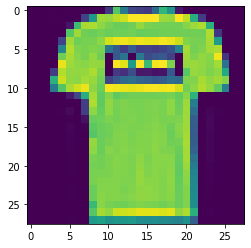

In [ ]:
import matplotlib.pyplot as plt
# fmnist_data = k.datasets.fashion_mnist
# (x_train, y_train), (x_test, y_test) = fmnist_data.load_data()
plt.imshow(k.datasets.fashion_mnist.load_data()[0][0][1])

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras as k
from sklearn.preprocessing import OneHotEncoder #StandardScaler, Normalizer, MinMaxScaler
from sklearn.model_selection import train_test_split
from datetime import datetime

In [ ]:
(X_train, y_train), (X_test, y_test) = k.datasets.cifar10.load_data()

X = np.concatenate([X_train, X_test])
y = np.concatenate([y_train, y_test])


X = X / 225.0

oh_encoder = OneHotEncoder()
oh_encoder.fit(y)
y = oh_encoder.transform(y[:, 0:1]).toarray()


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.15)

X_train, X_valid, y_train, y_valid = train_test_split(X_train,
                                                      y_train,
                                                      test_size=0.15)

In [ ]:
early_stopping_callback = k.callbacks.EarlyStopping(restore_best_weights=True,
                                                    patience=5)
tb_callback = k.callbacks.TensorBoard(f"tb_logs/cifar10/{datetime.now().strftime('%Y-%m-%d_%H-%M')}")

In [ ]:
model = k.models.Sequential([
    k.layers.Flatten(input_shape=X_train.shape[1:]),
    k.layers.Dense(200, activation='relu'),
    k.layers.Dense(150, activation='relu'),
    k.layers.Dense(100, activation='relu'),
    k.layers.Dense(75,  activation='relu'),
    k.layers.Dense(10,  activation='softmax')
])

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics='accuracy'
)

In [ ]:
history = model.fit(
    X_train,
    y_train,
    epochs=210,
    validation_data=[X_valid, y_valid],
    callbacks = [tb_callback, early_stopping_callback]
)

Epoch 1/210
1355/1355 [==============================] - 10s 7ms/step - loss: 1.9418 - accuracy: 0.2926 - val_loss: 1.8313 - val_accuracy: 0.3425
Epoch 2/210
1355/1355 [==============================] - 9s 7ms/step - loss: 1.7389 - accuracy: 0.3751 - val_loss: 1.7813 - val_accuracy: 0.3643
Epoch 3/210
1355/1355 [==============================] - 9s 7ms/step - loss: 1.6528 - accuracy: 0.4058 - val_loss: 1.6287 - val_accuracy: 0.4178
Epoch 4/210
1355/1355 [==============================] - 9s 6ms/step - loss: 1.5977 - accuracy: 0.4286 - val_loss: 1.6674 - val_accuracy: 0.4108
Epoch 5/210
1355/1355 [==============================] - 8s 6ms/step - loss: 1.5479 - accuracy: 0.4480 - val_loss: 1.6060 - val_accuracy: 0.4268
Epoch 6/210
1355/1355 [==============================] - 9s 6ms/step - loss: 1.5125 - accuracy: 0.4582 - val_loss: 1.5813 - val_accuracy: 0.4498
Epoch 7/210
1355/1355 [==============================] - 9s 6ms/step - loss: 1.4735 - accuracy: 0.4746 - val_loss: 1.4988 - val_a

In [ ]:
early_stopping_callback.best_weights

[array([[-0.02508067, -0.03334561, -0.02144991, ...,  0.03318071,
         -0.02089412, -0.00240068],
        [ 0.05648606, -0.02586607,  0.00537451, ..., -0.03598863,
          0.00310797,  0.01778275],
        [ 0.02382746,  0.04007661,  0.02124556, ..., -0.0012454 ,
          0.06983464,  0.01131612],
        ...,
        [-0.01702288, -0.02329797, -0.02669494, ...,  0.04122135,
          0.0288592 ,  0.04205538],
        [ 0.0160239 , -0.00739117,  0.01327451, ...,  0.02334978,
         -0.01969835,  0.03375249],
        [-0.01743956,  0.01891793, -0.00783742, ..., -0.02519464,
         -0.01927463,  0.01080537]], dtype=float32),
 array([-4.95840386e-02, -1.67941395e-03,  1.17058624e-02, -7.44494647e-02,
         4.37897304e-03, -3.37684900e-02, -2.72371527e-02,  2.17803735e-02,
        -5.83170564e-04, -1.58696160e-01, -3.67166065e-02,  3.80413677e-03,
         3.68952230e-02,  8.06835853e-03,  9.70367044e-02,  8.30021352e-02,
         3.80439870e-03, -9.21092695e-04, -3.84669378e

In [ ]:
best_model

1.3579026460647583

In [ ]:
import math

In [ ]:
pwd

'/content'

In [ ]:
ls

sample_data/
